In [29]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
dfcpu = pd.read_csv('../data/processed/cpu4.csv')
dfcpu = dfcpu.sort_values(by='timestamp', ascending=True)
dfcpu = dfcpu.replace({'label': {0.0: False, 1.0: True}})

In [31]:
dfcpu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17568 entries, 0 to 17567
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    17568 non-null  int64  
 1   value        17568 non-null  float64
 2   label        17568 non-null  bool   
 3   datetime     17568 non-null  object 
 4   date         17568 non-null  object 
 5   time         17568 non-null  object 
 6   month        17568 non-null  object 
 7   day          17568 non-null  object 
 8   hour         17568 non-null  int64  
 9   minute       17568 non-null  int64  
 10  value_lag_1  17567 non-null  float64
 11  value_lag_3  17565 non-null  float64
 12  value_lag_5  17563 non-null  float64
 13  value_lag_7  17561 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(5)
memory usage: 1.9+ MB


# Rule Based Model


In [90]:
dfcpu['pred'] = (dfcpu.value <-1.5) | (dfcpu.value > 2.9)

In [91]:
dfcpu.head()

,timestamp,value,label,datetime,date,time,month,day,hour,minute,value_lag_1,value_lag_3,value_lag_5,value_lag_7,pred
0,1469376000,0.847300,False,2016-07-24 16:00:00,2016-07-24,16:00:00,July,Sunday,16,0,NaN,NaN,NaN,NaN,False
1,1469376300,-0.036137,False,2016-07-24 16:05:00,2016-07-24,16:05:00,July,Sunday,16,5,0.847300,NaN,NaN,NaN,False
2,1469376600,0.074292,False,2016-07-24 16:10:00,2016-07-24,16:10:00,July,Sunday,16,10,-0.036137,NaN,NaN,NaN,False
3,1469376900,0.074292,False,2016-07-24 16:15:00,2016-07-24,16:15:00,July,Sunday,16,15,0.074292,0.847300,NaN,NaN,False
4,1469377200,-0.036137,False,2016-07-24 16:20:00,2016-07-24,16:20:00,July,Sunday,16,20,0.074292,-0.036137,NaN,NaN,False


In [92]:
print(dfcpu.label.value_counts())
print(dfcpu.label.value_counts(normalize=True))

False    17359
True       209
Name: label, dtype: int64
False    0.988103
True     0.011897
Name: label, dtype: float64


In [93]:
print(dfcpu.pred.value_counts())
print(dfcpu.pred.value_counts(normalize=True))

False    17109
True       459
Name: pred, dtype: int64
False    0.973873
True     0.026127
Name: pred, dtype: float64


In [94]:
dfcpu.date.max()

'2016-09-23'

In [95]:
train = dfcpu.loc[dfcpu.date < '2016-09-01'][['value', 'pred']]
test = dfcpu.loc[dfcpu.date >= '2016-09-01'][['value', 'pred']]

print(test.pred.value_counts())
X_train = np.array(train.value).reshape(-1,1)
y_train = np.array(train.pred)
X_test = np.array(test.value).reshape(-1,1) 
y_test = np.array(test.pred)


False    6446
True       82
Name: pred, dtype: int64


((11040, 1), (11040,))

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

0.9878048780487805


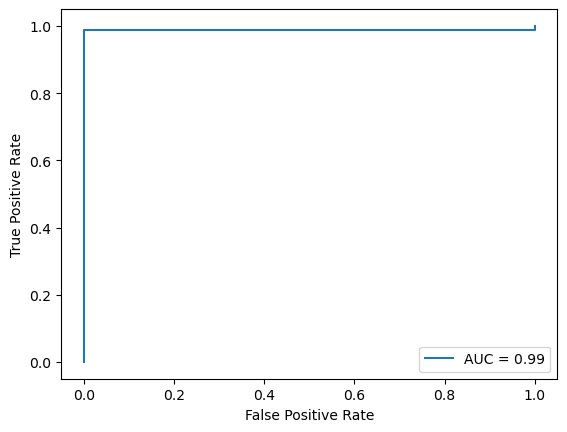

In [99]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

#use model to predict probability that given y value is 1
y_pred_proba = log_regression.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
plt.show()